# MNIST CLASSIFICATION MODEL

## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt

## Fetching MNIST dataset from in-built datasets module

    The MNIST dataset contains 2D data of images of 28x28 pixels.

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### No. of images in dataset each with 784 pixel data.

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

### Target determines what number is being represented

In [4]:
y.shape

(70000,)

### Displaying The 2D images

In [5]:
some_digit = X.iloc[0]
some_digit_pxl = np.array(some_digit).reshape(28,28) #Reshapes into 2-D
some_digit

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

In [6]:
some_digit_pxl

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

### Image 1

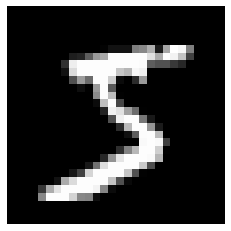

In [7]:
plt.imshow(some_digit_pxl, cmap="gray", interpolation="none")
plt.axis("off")
plt.show()

In [8]:
y[0]

'5'

### Image 120

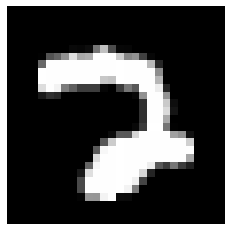

'2'

In [9]:
plt.imshow(np.array(X.iloc[120]).reshape(28,28), cmap="gray", interpolation="none")
plt.axis("off")
plt.show()
y[120]

###  Image 100 

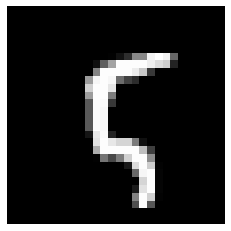

'5'

In [10]:
plt.imshow(np.array(X.iloc[100]).reshape(28,28), cmap="gray", interpolation="none")
plt.axis("off")
plt.show()
y[100]

In [11]:
y = y.astype(np.uint8) #type casting target array to integer type

In [12]:
y.dtype

dtype('uint8')

## Training and testing the dataset

In [13]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## KNearest Neighbor classification model:

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Performance measure of the Model:

In [17]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



    The above results can be understood as, precision score of classification element 0 is 0.96 with the support value(samples) of 980 ,and the precision score of classification element 1 is 0.95 with the support value(samples) of 1135.

In [18]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
mat

'''A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, 
where N is the number of target classes. The matrix compares the actual target values with those predicted by 
the machine learning model.'''

'A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, \nwhere N is the number of target classes. The matrix compares the actual target values with those predicted by \nthe machine learning model.'

<AxesSubplot:>

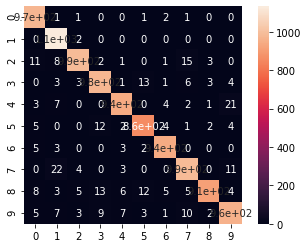

In [19]:
import seaborn as sns
sns.heatmap(mat, annot=True, square=True)

In [20]:
knn.score(X_test, y_test) #Accuracy of the model is 96.8%

0.9688

In [28]:
import pickle

In [29]:
pickle.dump(knn, open("model.pkl","wb"))